<a href="https://colab.research.google.com/github/axelqc/Data-science-projetcs/blob/main/Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 


In [ ]:
data_f = pd.read_excel('datos_HA.xlsx')

In [ ]:
data_fNP = np.array(data_f)

In [ ]:
data_f.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Limpieza

In [ ]:
datos_seleccionados = data_f.iloc[:,1:12] #seleccionando, (quitanto clolumna id)

In [ ]:
datos_seleccionados.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
datos_seleccionados.isnull().values.any()
# True = valores vacios

True

In [ ]:
datos_seleccionados.isnull().sum() #Tenemos 201 NaN en BMI

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data_f.groupby("smoking_status").count() #Podemos ver 1522 unknowns en si fumaban o no

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,,
Unknown,1544,1544,1544,1544,1544,1544,1544,1544,1544,1483,1544
formerly smoked,885,885,885,885,885,885,885,885,885,837,885
never smoked,1892,1892,1892,1892,1892,1892,1892,1892,1892,1852,1892
smokes,789,789,789,789,789,789,789,789,789,737,789


Quitando los NAN

In [ ]:
datosSIN_NAN = datos_seleccionados.dropna(axis = 0)

In [ ]:
datosSIN_NAN.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
datosSIN_NAN.isnull().sum() #Comprobando que no tengan NAN

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
datosSIN_NAN.isnull().values.any() #Segunda comprobacion 

False

In [ ]:
datosSIN_NAN.groupby("smoking_status").count() #podemos ver 1483 unknows, decidimos borrarlos

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,
Unknown,1483,1483,1483,1483,1483,1483,1483,1483,1483,1483
formerly smoked,837,837,837,837,837,837,837,837,837,837
never smoked,1852,1852,1852,1852,1852,1852,1852,1852,1852,1852
smokes,737,737,737,737,737,737,737,737,737,737


COntinuando proceso de limpieza

In [ ]:
CL_data_F = pd.read_excel("Datos_sin_nan.xlsx")

In [ ]:
CL_data_F.groupby("smoking_status").count() #Ya tenemos los datos limpios, pero falta trabajo por hacer

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
smoking_status,,,,,,,,,,
formerly smoked,837,837,837,837,837,837,837,837,837,837
never smoked,1852,1852,1852,1852,1852,1852,1852,1852,1852,1852
smokes,737,737,737,737,737,737,737,737,737,737


Estadistica

In [55]:
datos_Listos = pd.read_excel("ValoresBinarios.xlsx")
np_datos = np.array(datos_Listos)

In [6]:
datos_Listos.head()

,female,male,age,hypertension,heart_disease,ever_married,WT_PR,WT_SE,WT_GOVJ,WT Children,WT_NEverW,ResTy Ur,ResTy Ru,avg_glucose_level,bmi,Smokes Never,Smokes For,Smokes,stroke
0,0,1,67,0,1,1,1,0,0,0,0,1,0,228.69,36.6,0,1,0,1
1,0,1,80,0,1,1,1,0,0,0,0,0,1,105.92,32.5,1,0,0,1
2,1,0,49,0,0,1,1,0,0,0,0,1,0,171.23,34.4,0,0,1,1
3,1,0,79,1,0,1,0,1,0,0,0,0,1,174.12,24.0,1,0,0,1
4,0,1,81,0,0,1,1,0,0,0,0,1,0,186.21,29.0,0,1,0,1


In [21]:
datos_Listos.var()

female                  0.238152
male                    0.238152
age                   355.369205
hypertension            0.104938
heart_disease           0.056530
ever_married            0.183174
WT_PR                   0.229778
WT_SE                   0.149932
WT_GOVJ                 0.127558
WT Children             0.019460
WT_NEverW               0.004071
ResTy Ur                0.249986
ResTy Ru                0.249986
avg_glucose_level    2275.627777
bmi                    53.231010
Smokes Never            0.248426
Smokes For              0.184676
Smokes                  0.168892
stroke                  0.049794
dtype: float64

In [7]:
datos_Listos.describe()

,female,male,age,hypertension,heart_disease,ever_married,WT_PR,WT_SE,WT_GOVJ,WT Children,WT_NEverW,ResTy Ur,ResTy Ru,avg_glucose_level,bmi,Smokes Never,Smokes For,Smokes,stroke
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000
mean,0.609165,0.390835,48.645943,0.119089,0.060128,0.758611,0.642440,0.183596,0.150029,0.019848,0.004086,0.509340,0.490660,108.321891,30.290047,0.540572,0.244308,0.215120,0.052539
std,0.488009,0.488009,18.851239,0.323941,0.237759,0.427988,0.479352,0.387211,0.357152,0.139499,0.063804,0.499986,0.499986,47.703541,7.295958,0.498424,0.429739,0.410965,0.223145
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,34.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.237500,25.300000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,50.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,92.360000,29.100000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,63.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,116.207500,34.100000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,271.740000,92.000000,1.000000,1.000000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


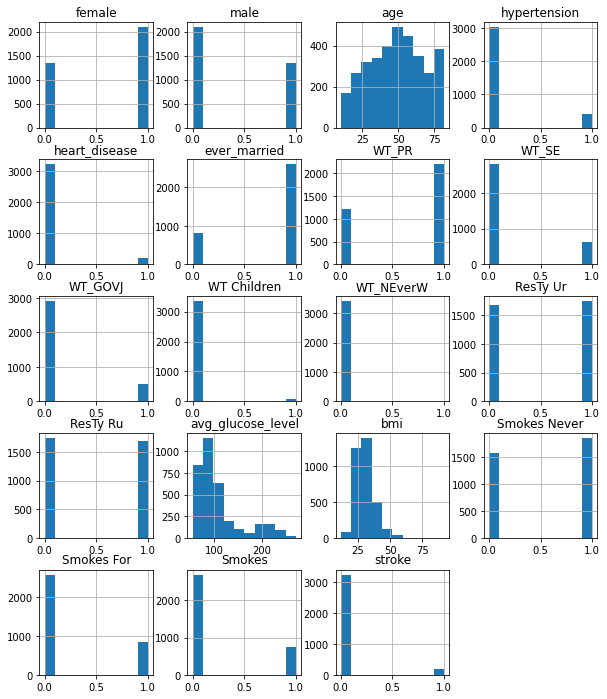

In [20]:
# Histograma
datos_Listos.columns[0]
fig = plt.figure(figsize = (10,12))
ax = fig.gca()
datos_Listos.hist(ax = ax)
plt.show()

In [131]:
datos_Listos = datos_Listos.dropna()
datos_Listos.columns
X = datos_Listos[['female',	'male',	'age',	'hypertension',	'heart_disease',	'ever_married',	'WT_PR',	'WT_SE',	'WT_GOVJ',	'WT Children',
             'WT_NEverW',	'ResTy Ur',	'ResTy Ru',	'avg_glucose_level',	'bmi',	'Smokes Never',	'Smokes For',	'Smokes']].values

y = datos_Listos['stroke'].values

In [132]:
modelo_regresion = LinearRegression()

modelo_regresion.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [134]:
 from sklearn.linear_model import LinearRegression
x_columns = ['female',	'male',	'age',	'hypertension',	'heart_disease',	'ever_married',	'WT_PR',	'WT_SE',	'WT_GOVJ',	'WT Children',
             'WT_NEverW',	'ResTy Ur',	'ResTy Ru',	'avg_glucose_level',	'bmi',	'Smokes Never',	'Smokes For',	'Smokes']
coeff_df = pd.DataFrame(modelo_regresion.coef_ , x_columns , columns=['Coeficientes'])
coeff_df 

,Coeficientes
female,-0.001380
male,0.001380
age,0.002751
hypertension,0.049608
heart_disease,0.043322
ever_married,-0.029371
WT_PR,-0.006477
WT_SE,-0.018878
WT_GOVJ,-0.019029
WT Children,0.027992


In [135]:
y_pred = modelo_regresion.predict(X_test)

In [139]:
validacion = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred, 'Diferencia': y_test-y_pred}) 

muestra_validacion = validacion.head(5) 

muestra_validacion 

,Actual,Predicción,Diferencia
0,0,0.058560,-0.058560
1,0,0.105353,-0.105353
2,0,0.033866,-0.033866
3,0,0.086979,-0.086979
4,0,0.112549,-0.112549


In [137]:
validacion["Diferencia"].describe()

count    1028.000000
mean        0.007234
std         0.222350
min        -0.234546
25%        -0.081572
50%        -0.028357
75%         0.006293
max         0.987767
Name: Diferencia, dtype: float64

In [141]:
r2_score(y_test, y_pred) 

0.08604955269686942